## Task 2

### Import Packages

In [88]:
import pickle
import numpy as np
import random
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

### Load and Process Data

In [89]:
MAX_DEGREE = 20
PARTITIONS = 10

total_train_set = pickle.load(open('data/train.pkl', 'rb'))
test_set = pickle.load(open('data/test.pkl', 'rb'))
test_set = test_set.transpose()
train_sets = np.array_split(np.array(random.sample(
    list(total_train_set), k=int(total_train_set.size/2))), PARTITIONS)

### For all Polynomials train models and get the bias, variance and irreducible errors

In [90]:
degree_data = {
    'degree': [i for i in range(1, MAX_DEGREE+1)],
    'bias': [],
    'variance': [],
    'error': []
}
for degree in degree_data['degree']:
    models = []
    for train_set in train_sets:
        train_set = train_set.transpose()
        x = PolynomialFeatures(degree=degree).fit_transform(
            train_set[0].reshape((-1, 1)))
        models.append(LinearRegression().fit(x, train_set[1]))
    diffs = []
    predictions = []
    errors = []
    for model in models:
        prediction = model.predict(PolynomialFeatures(
            degree=degree).fit_transform(test_set[0].reshape((-1, 1))))
        diffs.append(prediction-list(test_set[1]))
        predictions.append(prediction)
        errors.append(mean_squared_error(test_set[1], np.array(prediction)))
    bias_square = np.mean(np.mean(np.array(diffs).transpose(), axis=1)**2)
    bias = math.sqrt(bias_square)
    predictions = np.array(predictions)
    variance = np.mean((predictions - np.mean(predictions,axis=0))**2)
    mse = np.mean(np.array(errors))
    error = abs(mse - ((bias*bias) + variance))
    degree_data['bias'].append(bias)
    degree_data['variance'].append(variance)
    degree_data['error'].append(error)

### Print the table of bias and variance data

In [91]:
bias_variance_dict = {
    'degree': degree_data['degree'],
    'bias': degree_data['bias'],
    'variance': degree_data['variance']
}
print(tabulate(bias_variance_dict, headers="keys", tablefmt="fancy_grid"))

╒══════════╤═══════════╤════════════╕
│   degree │      bias │   variance │
╞══════════╪═══════════╪════════════╡
│        1 │ 1002.51   │    37462.3 │
├──────────┼───────────┼────────────┤
│        2 │  980.137  │    70220.6 │
├──────────┼───────────┼────────────┤
│        3 │   89.7778 │    76128.8 │
├──────────┼───────────┼────────────┤
│        4 │   84.9916 │    91571.4 │
├──────────┼───────────┼────────────┤
│        5 │   82.5959 │    99976.9 │
├──────────┼───────────┼────────────┤
│        6 │   82.0435 │   116762   │
├──────────┼───────────┼────────────┤
│        7 │   89.7962 │   145694   │
├──────────┼───────────┼────────────┤
│        8 │   94.9801 │   187750   │
├──────────┼───────────┼────────────┤
│        9 │   94.2311 │   201067   │
├──────────┼───────────┼────────────┤
│       10 │  101.291  │   237547   │
├──────────┼───────────┼────────────┤
│       11 │   98.1505 │   247052   │
├──────────┼───────────┼────────────┤
│       12 │  148.735  │   233621   │
├──────────┼

## Task 3

### Print the table of error data

In [92]:
error_dict = {
    'degree': degree_data['degree'],
    'error': degree_data['error']
}
print(tabulate(error_dict, headers="keys", tablefmt="fancy_grid"))

╒══════════╤═════════════╕
│   degree │       error │
╞══════════╪═════════════╡
│        1 │ 2.32831e-10 │
├──────────┼─────────────┤
│        2 │ 0           │
├──────────┼─────────────┤
│        3 │ 1.45519e-11 │
├──────────┼─────────────┤
│        4 │ 0           │
├──────────┼─────────────┤
│        5 │ 0           │
├──────────┼─────────────┤
│        6 │ 1.45519e-11 │
├──────────┼─────────────┤
│        7 │ 2.91038e-11 │
├──────────┼─────────────┤
│        8 │ 5.82077e-11 │
├──────────┼─────────────┤
│        9 │ 5.82077e-11 │
├──────────┼─────────────┤
│       10 │ 2.91038e-11 │
├──────────┼─────────────┤
│       11 │ 0           │
├──────────┼─────────────┤
│       12 │ 5.82077e-11 │
├──────────┼─────────────┤
│       13 │ 5.82077e-11 │
├──────────┼─────────────┤
│       14 │ 0           │
├──────────┼─────────────┤
│       15 │ 5.82077e-11 │
├──────────┼─────────────┤
│       16 │ 0           │
├──────────┼─────────────┤
│       17 │ 5.82077e-11 │
├──────────┼─────────────┤
│

## Task 4

### Plotting the Bias<sup>2</sup>-Variance graph

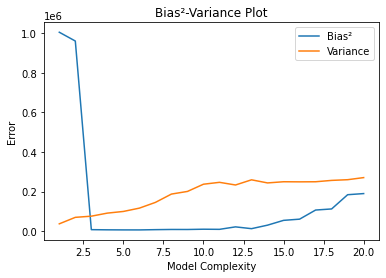

In [93]:
plt.plot(degree_data['degree'], np.array(
    degree_data['bias'])**2, label='Bias\u00b2')
plt.plot(degree_data['degree'], degree_data['variance'], label='Variance')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias\u00b2-Variance Plot')
plt.legend()
plt.show()